In [1]:
# Libs
#torch"
import torch.nn as nn
import torch
import torch.optim as optim
import torch.nn.functional as F
import logging
import pandas as pd
from collections import OrderedDict
import pickle
import numpy as np
import seaborn as sns
import datetime
import os
import random
import glob
import matplotlib.pyplot as plt
from functools import reduce
# Own Modules
from source_torch.mlca.mlca_setup import set_value_model_parameters
from source_torch.mlca.mlca import mlca_mechanism
from source_torch.util import save_result,load_result

MLCA NN Class imported
MLCA NN_MIP Class imported
WDP Class imported
MLCA_Economies imported
MLCA function imported


In [2]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 2080 Ti'

In [3]:
# log debug to console
logging.basicConfig(level=logging.DEBUG, format='%(asctime)s:               %(message)s', datefmt='%H:%M:%S')
device0='cuda'
torch.cuda.is_available()

dirname = './experiments/MLCA/Torch/results'
#os.makedirs(dirname,exist_ok=True)

In [21]:
#model to test
model_name_1 = '/GSVM_unif'#LSVM MRVM GSVM
model_name_2 = '/LSVM_unif'
model_name_3 = '/MRVM'
#model_name_4 = '/LSVM_gali'
models = [model_name_1, model_name_2, model_name_3]

result_file_dir_1 = dirname+models[0]+'_'+str(7)+'_'+str(8)+'_'+str(15)+'_'+str(25)+'/results'
result_file_dir_2 = dirname+models[1]+'_'+str(7)+'_'+str(8)+'_'+str(15)+'_'+str(25)+'/results'
result_file_dir_3 = dirname+models[2]+''+str(7)+'_'+str(8)+'_'+str(15)+'_'+str(26)+'/results'
#result_file_dir_4 = dirname+models[3]+'_'+str(6)+'_'+str(29)+'_'+str(17)+'_'+str(0)+'/results'
results_file_1 = load_result(result_file_dir_1)[0]#only for one iteration
results_file_2 = load_result(result_file_dir_2)
results_file_3 = load_result(result_file_dir_3)[0]
#results_file_4 = load_result(result_file_dir_4)[0]


./experiments/MLCA/Torch/results/GSVM_unif_7_8_15_25/results is loaded 
./experiments/MLCA/Torch/results/LSVM_unif_7_8_15_25/results is loaded 
./experiments/MLCA/Torch/results/MRVM7_8_15_26/results is loaded 


0.9358342437372545

In [22]:
results = [results_file_1, results_file_2, results_file_3]

In [23]:
#results[0]['Statistics'].keys()
#for
for i in range(len(results)):
    print(len(results[0]['Elicited Bids']['Bidder_' + str(i)][0]))

101
101
101


In [24]:
for i in range(len(results)):
    print(models[i] + ': ')
    print('MLCA Efficiency: ' + str(results[i]['MLCA Efficiency']))
    print('Number of Iterations: ' + str(len(results[i]['Statistics']['Efficiency per Iteration'])))
    print('Total Time Elapsed: ' + str(results[i]['Statistics']['Total Time Elapsed']))
    print('Elapsed Times of MIPs: ' + str(results[i]['Statistics']['Elapsed Times of MIPs']))
    #print('Number of bundles per Bidder ' + str(results[i]['Elicited Bids']))

/GSVM_unif: 
MLCA Efficiency: 1.0
Number of Iterations: 11
Total Time Elapsed: 0d 10h:42m:33s
Elapsed Times of MIPs: OrderedDict([('Marginal Economy -(0)', [22.11887502670288, 17.558690071105957, 16.96331214904785, 54.592610120773315, 90.4197928905487, 94.57330703735352, 71.61931991577148, 76.13076710700989, 46.49105787277222, 67.06583285331726, 15.253649950027466, 34.462456941604614, 15.07199215888977, 41.682286977767944, 65.68702483177185, 65.34201884269714, 96.6501259803772, 70.07177686691284, 70.7829339504242, 66.45824217796326, 37.89802694320679, 64.5875039100647, 38.83310413360596, 64.70278286933899, 43.97306990623474, 40.01312494277954, 73.74731683731079, 115.42072415351868, 69.06222319602966, 124.9230740070343, 84.26062512397766, 58.887699127197266, 62.61489796638489, 63.133630990982056, 71.25520205497742, 52.139506816864014, 61.65563702583313, 93.42775583267212, 110.95601391792297, 95.0995888710022, 58.04840111732483, 96.3401370048523, 78.40270709991455, 83.32205700874329, 91.

In [25]:
#function to efficiency for different models
def plot_efficiency(results, types):
    df = pd.DataFrame(columns=['Efficiency', 'Type'])
    for i in range(len(results)):
        df = df.append({'Efficiency': results[i]['MLCA Efficiency'], 'Type': types[i]}, ignore_index=True)
    
    sns.set(style="whitegrid")
    g = sns.catplot(
    data=df, kind="bar",
    x="Type", y="Efficiency", palette="dark", alpha=.6, height=6
    )
    # hue="something additional on the right"
    #errorbar="Standard Deviation"
    #g.despine(left=True)
    g.set_axis_labels("", "Efficiency")

def plot_efficiency_per_round(results, types):
    df = pd.DataFrame(columns=['Iteration', 'Efficiency', 'Type'])
    for i in range(len(results)):
        for j in range(len(results[i]['Statistics']['Efficiency per Iteration'])):
            df = df.append({'Iteration': j, 'Efficiency': results[i]['Statistics']['Efficiency per Iteration'][j], 'Type': types[i]}, ignore_index=True)
    
    sns.set_theme(style="darkgrid")
    sns.lineplot(x="Iteration", y="Efficiency",
             data=df, hue = 'Type')
    # Get the current axes object
    ax = plt.gca()

    # Set custom steps for the x-axis ticks
    custom_ticks = np.arange(0, np.max(df['Iteration'])+1, 1)  # Custom steps: start=0, stop=10, step=2
    ax.set_xticks(custom_ticks)

11:17:14:               findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=11.0.
11:17:14:               findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05
11:17:14:               findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05
11:17:14:               findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
11:17:14:               findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
11:17:14:               findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal regular normal>) = 10.05
11:17:14:               findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal bold normal>) = 2.335
11:17:14:               findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal bold normal>) = 10.335
11:17:14:               findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique

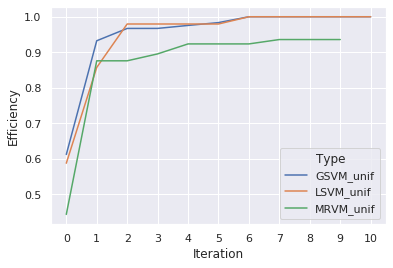

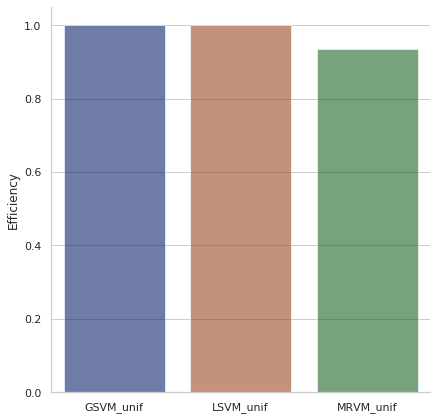

In [26]:
plot_efficiency_per_round(results, ['GSVM_unif', 'LSVM_unif', 'MRVM_unif'])
plot_efficiency(results, ['GSVM_unif', 'LSVM_unif', 'MRVM_unif'])

In [30]:
results[2]['Statistics']['Efficiency per Iteration']

OrderedDict([(0, 0.5083803905189288),
             (1, 0.8721127072078818),
             (2, 0.902746982296867),
             (3, 0.9128866737766014),
             (4, 0.9128866737766025),
             (5, 0.9128866737766014),
             (6, 0.9357784382230352),
             (7, 0.9357784382230294),
             (8, 0.9357784382230316),
             (9, 0.9439172925977332)])

In [14]:
def _get_file_names(dir_file,Domain,Qinit,Qmax,Seed):
    Domain=Domain
    Qinit= Qinit
    Qmax= Qmax
    Seed = Seed
    my_dict={}
    
    for i in Domain:
        for l in Qinit:
            for k in Qmax:
                for j in Seed:
                    key_name=i+'_'+str(l)+'_'+str(k)+'_'+str(j)
                    instance = dir_file+i+'_'+str(l)+'_'+str(k)+'_'+str(j)+'_'+'*'
                    my_dict[key_name]=glob.glob(instance)

    my_dict = dict( [(k,v) for k,v in my_dict.items() if len(v)>0])
    return(my_dict)

def _retrieve_data(my_dict):
    mydict_data={}
    for key, value in my_dict.items():
        data=[]
        for i in my_dict[key]:
            tmp=load_result(i)
            data.append(tmp['result'])
        mydict_data[key] = pd.DataFrame.from_records(data)
    return(mydict_data)

def NN_Bidder_df(dict_nn,summary):
    seeds = list(dict_nn.keys())
    bidders = list(dict_nn[seeds[0]]['Main Economy'].keys())
    rounds= list(np.arange(0,len(dict_nn[seeds[0]]['Main Economy'][bidders[0]]),1))

    main_dict = {}
    if summary[0] =='Full':
        for seed in seeds:
            main_dict[seed]={}
            for bidder in bidders:
                main_dict[seed][bidder]={}
                for rond in rounds:
                    main_dict[seed][bidder][rond]=[]
                    for marginal,values in dict_nn[seed].items() :
                        try:
                            main_dict[seed][bidder][rond].append(dict_nn[seed][marginal][bidder][rond][2])
                        except:
                            pass
        return(pd.DataFrame.from_dict(main_dict))

                    
    elif summary[0]=='Compact':
        for bidder in bidders:
            main_dict[bidder]={}
            for rond in rounds:
                main_dict[bidder][rond]=[]
                for seed in seeds:
                    for marginal,values in dict_nn[seed].items():
                        try:
                            main_dict[bidder][rond].append(dict_nn[seed][marginal][bidder][rond][2])
                        except:
                            pass
    
        if summary[1]=='Average':
            summary_dict= pd.DataFrame({'Round':[],'Mean':[],'Std':[],'Type':[]})
            for bidder in bidders:
                for rond in rounds:
                    mean=np.array(main_dict[bidder][rond]).mean()
                    std=np.array(main_dict[bidder][rond]).std()
                    new_row= {'Round':rond,'Mean':mean,'Std':std,'Type':bidder}
                    summary_dict = summary_dict.append(new_row, ignore_index=True)
                    
            return(summary_dict)

        elif summary[1]=='Particular':
            summary_dict= pd.DataFrame({'Round':[],'Error':[],'Type':[]})
            for bidder in bidders:
                for rond in rounds:
                    tmp = main_dict[bidder][rond]
                    for i in range(len(tmp)):
                        new_row= {'Round':rond,'Error':tmp[i],'Type':bidder}
                        summary_dict = summary_dict.append(new_row, ignore_index=True)
                        
            return(summary_dict)                        
        elif summary[1]=='None':
                  
            return(pd.DataFrame.from_dict(main_dict))
        
def Eff_round(raw_dict,setting):
    seeds = list(raw_dict.keys())
    rounds= list(raw_dict[seeds[0]].keys())
    tpe= setting
    df= pd.DataFrame({'Round':[],'Efficiency':[],'Type':setting})
    for seed in seeds:
        for rond in rounds:
            new_row= {'Round':rond,'Efficiency':raw_dict[seed][rond],'Type':setting}
            df = df.append(new_row, ignore_index=True)    
    
    return(df)


def get_results(dir_file,Domain,Qinit,Qmax,Seed):
    Domain=Domain
    Qinit= Qinit
    Qmax= Qmax
    Seed = Seed
    my_dict={}
    
    my_dict=_get_file_names(dir_file,Domain,Qinit,Qmax,Seed)
    mydict_data=_retrieve_data(my_dict)
    
    return(mydict_data)

def get_summary(input_dict,criteria):
    my_dict={}
    if criteria=='Efficiency':
    
        for keys in input_dict.keys():
            my_dict[keys]=input_dict['Statistics'][0]['Efficiency per Iteration']
            
        return(pd.DataFrame.from_records(my_dict))
            
    elif criteria=='NN Losses':
            
        for keys in input_dict.keys():
            my_dict[keys]=input_dict[keys]['Statistics'][0]['NN Losses']
            
        return(my_dict)

        
    elif criteria=='Total Time':
            
        for keys in input_dict.keys():
            my_dict[keys]=[input_dict['Statistics'][0]['Total Time Elapsed']]
        
        return(pd.DataFrame.from_dict(my_dict))


In [15]:
#tensor-pytorch
Domain = ['GSVM']
Qinit= [30]
Qmax= [100]
Seed = np.arange(10,500,10)

dir_file_1 = './experiments/alper/Alloc/mip_alloc/gsvm_mip/'
dir_file_2 = './experiments/MLCA/Alloc/pytorch_alloc/GSVM_final/'
# dir_file_3 = './experiments/MLCA/Alloc/pytorch_alloc/sample_numbers/sample-100/'
# dir_file_4 = './experiments/MLCA/Alloc/pytorch_alloc/sample_numbers/sample-500/'
# dir_file_5 = './experiments/MLCA/Alloc/pytorch_alloc/sample_numbers/sample-1k/'


#file_1 = get_results(result_file_dir,['GSVM'],Qinit,Qmax,Seed)
#print(file_1)
#file_2 = get_results(dir_file_2,['GSVM'],Qinit,Qmax,Seed)
# file_3 = get_results(dir_file_3,['GSVM'],Qinit,Qmax,Seed)
# file_4 = get_results(dir_file_4,['GSVM'],Qinit,Qmax,Seed)
# file_5 = get_results(dir_file_5,['GSVM'],Qinit,Qmax,Seed)


df_file_1 = get_summary(result_file,criteria='Efficiency')
print(df_file_1)
#df_file_2=get_summary(file_2,criteria='Efficiency')
# df_file_3=get_summary(file_3,criteria='Efficiency')
# df_file_4=get_summary(file_4,criteria='Efficiency')
# df_file_5=get_summary(file_5,criteria='Efficiency')

eff_file_1 = Eff_round(df_file_1,'GSVM DL-ICA')
#eff_file_2 = Eff_round(df_file_2,'GSVM RL-ICA')
# eff_file_3 = Eff_round(df_file_3,'Sample Number 100')
# eff_file_4 = Eff_round(df_file_4,'Sample Number 500')
# eff_file_5 = Eff_round(df_file_5,'Sample Number 1000')

combined = eff_file_1.merge(eff_file_2,how='outer')
# combined = combined.merge(eff_file_3,how='outer')
# combined = combined.merge(eff_file_4,how='outer')
# combined = combined.merge(eff_file_5,how='outer')

KeyError: 0

In [5]:
sns.catplot(x="Efficiency", y="Round", row="Type",
                kind="box", orient="h", height=2, aspect=4,
                data=combined)

sns.lineplot(
    data=combined,
    x="Round", y="Efficiency", hue="Type", err_style='bars',
    markers=True, dashes=True
)

NameError: name 'combined' is not defined

In [41]:
df_file_1 = get_summary(result_file,criteria='Total Time')
df_file_2 = get_summary(result_file,criteria='Total Time')


runtime_file_1=pd.to_timedelta(df_file_1.transpose()[0])
runtime_file_2=pd.to_timedelta(df_file_2.transpose()[0])



df_run_file_1 =pd.DataFrame({
    'Run Time(m)' : (runtime_file_1.astype('timedelta64[m]')).array,
    'Type' : 'DL-ICA'})
df_run_file_2 =pd.DataFrame({
    'Run Time(m)' : (runtime_file_2.astype('timedelta64[m]')).array,
    'Type' :'RL-ICA'})


frames = [df_run_file_1,df_run_file_2]

run_compact = pd.concat(frames)

KeyError: 'Statistics'

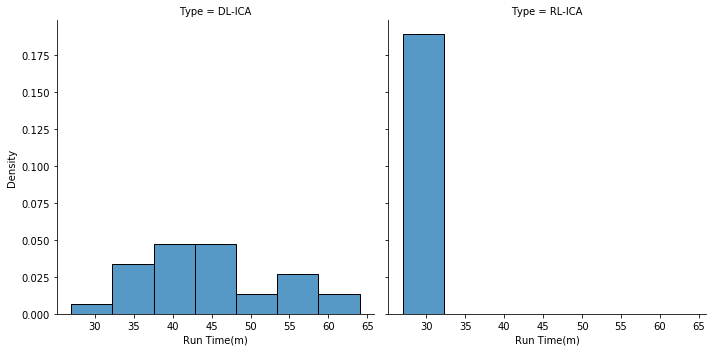

In [40]:
h=sns.displot(data=run_compact, x="Run Time(m)", col="Type", kde=False ,stat="density",common_norm=False)